# Notes

In [1]:
# Code: https://github.com/sgdecker/mjo
# Edited by Dave M : https://github.com/wxprediction/ForecastContest
# RMM/MJO Data: 'http://www.bom.gov.au/climate/mjo/graphics/rmm.74toRealtime.txt'

###############################
# Ideas for Improvement #######
###############################
### Evaluate in conjunction to teleconnections (NAO, AK Ridge, etc..)
### Evaluate conditioned on ENSO Phase
### Evaluate conditiononed on Teleconnection Phase (i.e., Phase 5 + neg NAO)
######## PERHAPS AS A MOUSE OVER/TOOL TIP WHERE WE ADD NAO/ENSO INFO
### Evaluate conditional by climate period
### Evaluate in conjunction to model guidance (need to think this out more)
### Evaluate each point as a function of lag
### Evaluate Directional Signal (cold vs warm)
########## Model Bias/Error as a function of phase/amp
########## Model Bias/Error as a function of the delta between MJO temp/pattern regime and the model guidance temp/pattern regime


#### Short term ideas for improvement
# Time series showing 20 day change (anomaly) for all time series
# Save flat files for all times of the year (Jan through Dec)
# Evaluate as a function of recent phase speed
# 'Detrend' or something of the sort the values (i.e., a 5 F anomaly in Jan 15 1982 would be what today)

### Done


# Load Packages

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
from datetime import datetime, date, timedelta
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Define Parameters

In [3]:
###############################################
# -2 is contemperaneous, -17 = Days 16 to 20
###############################################
shift_num_days = -17   
Lag_Period =     3       #   0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25
Lag_Period_Names=np.array(['Days 1-5', 'Days 6-10', 'Days 11-15', 'Days 16-20', 'Days 21-25'])

###############################################
# Selects analogs plus or minus 
# x days (analog range) of today's date and 
# from years indicated
###############################################
MarkDate='2018-01-15'  # Year is not relevant - only month and day
first_year = 1981 # 1981
last_year = 2018
analog_range=40 # days

###############################################
# Evalutes the RMM in the following range
###############################################
RMM_Min   =-2.00   # -2.50
RMM_Steps =+0.25    # .25, .50, 1.00
RMM_Max   =abs(RMM_Min) + RMM_Steps

proximity_filter=       0.6   # .5 is Default
Amp_filter=             2. # +100 is default. Less Than included
Angle_filter=           5  # (degrees) -999 is default. Greater than included

###############################################
# Categories and Types
###############################################
DD_Category='hdd' # 'hdd' or 'cdd'
DD_Type ='Anom' # 'Anom' or 'Change'

progression_filter=     -999  # No longer used.. dummy value.. need to remove

# Load Functions

In [4]:
def get_data(shift_num_days):
    mjo_df = pd.read_pickle('mjo.pickle.xz')
    deg_day_df = pd.read_pickle('deg_days5.pickle.xz')
    df = mjo_df.join(deg_day_df, how='outer')

    
    df['RMM1 LagNeg5']=df['RMM1']
    df['RMM2 LagNeg5']=df['RMM2']
    
    df['RMM1 Lag5']=df['RMM1']
    df['RMM2 Lag5']=df['RMM2']
    
    df['RMM1 Lag10']=df['RMM1']
    df['RMM2 Lag10']=df['RMM2']
    
    df['RMM1 Lag15']=df['RMM1']
    df['RMM2 Lag15']=df['RMM2']
    
    df['RMM1 Lag20']=df['RMM1']
    df['RMM2 Lag20']=df['RMM2']
   
    df['hdd_anom Lag0']=df['hdd_anom']
    df['cdd_anom Lag0']=df['cdd_anom']
    
    df['hdd_anom Lag5']=df['hdd_anom']
    df['cdd_anom Lag5']=df['cdd_anom']
    
    df['hdd_anom Lag10']=df['hdd_anom']
    df['cdd_anom Lag10']=df['cdd_anom']
    
    df['hdd_anom Lag15']=df['hdd_anom']
    df['cdd_anom Lag15']=df['cdd_anom']
    
    df['hdd_anom Lag20']=df['hdd_anom']
    df['cdd_anom Lag20']=df['cdd_anom']
    
    
    # MJO is available two days prior
    mjo_mask = df.columns.isin(['RMM1', 'RMM2','RMM1 LagNeg5', 'RMM2 LagNeg5','RMM1 Lag5', 'RMM2 Lag5','RMM1 Lag10', \
                                'RMM2 Lag10','RMM1 Lag15', 'RMM2 Lag15','RMM1 Lag20', 'RMM2 Lag20'])
    cols_to_shift = df.columns[mjo_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(2)
    
    
    mjo_lag_mask = df.columns.isin(['RMM1 LagNeg5', 'RMM2 LagNeg5'])
    cols_to_shift = df.columns[mjo_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(5)
    
    mjo_lag_mask = df.columns.isin(['RMM1 Lag5', 'RMM2 Lag5'])
    cols_to_shift = df.columns[mjo_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-5)
    
    mjo_lag_mask = df.columns.isin(['RMM1 Lag10', 'RMM2 Lag10'])
    cols_to_shift = df.columns[mjo_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-10)
    
    mjo_lag_mask = df.columns.isin(['RMM1 Lag15', 'RMM2 Lag15'])
    cols_to_shift = df.columns[mjo_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-15)
    
    mjo_lag_mask = df.columns.isin(['RMM1 Lag20', 'RMM2 Lag20'])
    cols_to_shift = df.columns[mjo_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-20)
    
###################
    
    dd_lag_mask = df.columns.isin(['cdd_anom Lag0', 'hdd_anom Lag0'])
    cols_to_shift = df.columns[dd_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-2)
    
    dd_lag_mask = df.columns.isin(['cdd_anom Lag5', 'hdd_anom Lag5'])
    cols_to_shift = df.columns[dd_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-7)
    
    dd_lag_mask = df.columns.isin(['cdd_anom Lag10', 'hdd_anom Lag10'])
    cols_to_shift = df.columns[dd_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-12)
    
    dd_lag_mask = df.columns.isin(['cdd_anom Lag15', 'hdd_anom Lag15'])
    cols_to_shift = df.columns[dd_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-17)
    
    dd_lag_mask = df.columns.isin(['cdd_anom Lag20', 'hdd_anom Lag20'])
    cols_to_shift = df.columns[dd_lag_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(-22)
    
    
    # Forecast is for 16-20 day period, so 17 days after today is center.
    dd_mask = df.columns.isin(['cdd_anom', 'hdd_anom','cdd_30yrNorm', 'hdd_30yrNorm'])
    cols_to_shift = df.columns[dd_mask]
    df[cols_to_shift] = df[cols_to_shift].shift(shift_num_days)

    return df

In [5]:
def criteria_filter(c, r, proximity_filter, progression_filter, Amp_filter, Angle_filter):
    
    res1 = (np.sqrt((c['RMM1'] - r[0])**2 + (c['RMM2'] - r[1])**2) < proximity_filter) 
 #   res2 = (np.sqrt((c['RMM1'] - c['RMM1 LagNeg5'])**2 + (c['RMM2'] - c['RMM2 LagNeg5'])**2) > progression_filter)
    
    # Amplitude
    res3 = (np.sqrt((c['RMM1'] - c['RMM1 LagNeg5'])**2 + (c['RMM2'] - c['RMM2 LagNeg5'])**2) < Amp_filter)
    
    # Angle
    angle_current = np.rad2deg(np.arctan2(c['RMM2'] ,c['RMM1']))
    angle_past    = np.rad2deg(np.arctan2(c['RMM2 LagNeg5'] ,c['RMM1 LagNeg5']))
    angle_current[ (angle_current<0) & (angle_past>90) ]=(360-angle_current)    
    res4 = (angle_current - angle_past) > Angle_filter
    
 #   res = np.logical_and(res1,res2)
    res = np.logical_and(res1,res3)
    res = np.logical_and(res,res4)
  #  print(res4)
    return res

In [6]:
def find_analogs(df, today, rmm, first_year, last_year, analog_range, proximity_filter, progression_filter, Amp_filter, Angle_filter):
    # Look for analogs plus or minus X days of today's date and between the years indicated
    tdelt = pd.to_timedelta(analog_range, 'D')

    periods = []
    for y in range(first_year, last_year+1):
        try:
            mid = pd.Timestamp(year=y, month=today.month, day=today.day)
        except ValueError:  # Leap day!
            mid = pd.Timestamp(year=y, month=3, day=1)
        prd = pd.period_range(mid - tdelt, mid + tdelt)
        for p in prd:
            periods.append(p.to_timestamp())
    periods = pd.to_datetime(periods)
    candidates = df.loc[periods]
    criteria = criteria_filter(candidates, rmm, proximity_filter, progression_filter,Amp_filter, Angle_filter)
    analogs = candidates[criteria]

    return(analogs)

In [7]:
def draw_mjo_phase(ax):
    c = plt.Circle((0,0), radius=1, fill=False)
    ax.add_patch(c)

    s2 = np.sqrt(2)/2
    lines = ((( 1, 3), (0,0)), (( s2, 3), ( s2, 3)), ((0,0), ( 1, 3)), ((-s2,-3), ( s2, 3)),
             ((-1,-3), (0,0)), ((-s2,-3), (-s2,-3)), ((0,0), (-1,-3)), (( s2, 3), (-s2,-3)))
    params = {'c': 'k', 'ls': '--', 'lw': 1.}
    for xy in lines:
        ax.plot(xy[0], xy[1], **params)
 
    phases = ((-2.9, -1.2, '1'), (-1.2, -2.9, '2'), (1.1, -2.9, '3'), (2.7, -1.2, '4'),
              (-2.9,  1.2, '8'), (-1.2,  2.7, '7'), (1.1,  2.7, '6'), (2.7,  1.2, '5'))
    for p in phases:
        ax.text(*p)

# Research

In [8]:
DD_Mean_List=[]
RMM1_Lag0_List=[]
RMM1_Lag5_List=[]
RMM1_Lag10_List=[]
RMM1_Lag15_List=[]
RMM1_Lag20_List=[]

RMM2_Lag0_List=[]
RMM2_Lag5_List=[]
RMM2_Lag10_List=[]
RMM2_Lag15_List=[]
RMM2_Lag20_List=[]

CDD_Anom_Lag0_List=[]
CDD_Anom_Lag5_List=[]
CDD_Anom_Lag10_List=[]
CDD_Anom_Lag15_List=[]
CDD_Anom_Lag20_List=[]

HDD_Anom_Lag0_List=[]
HDD_Anom_Lag5_List=[]
HDD_Anom_Lag10_List=[]
HDD_Anom_Lag15_List=[]
HDD_Anom_Lag20_List=[]

Event_Counter=[]

today = pd.Timestamp(MarkDate)
df = get_data(shift_num_days)
rmm1_range=np.arange(RMM_Min,RMM_Max,RMM_Steps)
rmm2_range=np.arange(RMM_Min,RMM_Max,RMM_Steps)
analogs=np.zeros((500,len(rmm1_range), len(rmm2_range)))

for cur_rmm1 in rmm1_range:
    print ('RMM1 = ', "{:0.2f}".format(cur_rmm1))
    for cur_rmm2 in rmm2_range:
        analogs=find_analogs(df, today, (cur_rmm1, cur_rmm2), first_year, last_year, analog_range,proximity_filter, progression_filter, \
                            Amp_filter, Angle_filter)
 #       DD_Mean_List.append(np.nanmean(analogs[DD_Type]))
        
        RMM1_Lag0_List.append(np.nanmean(analogs['RMM1']))
        RMM1_Lag5_List.append(np.nanmean(analogs['RMM1 Lag5']))
        RMM1_Lag10_List.append(np.nanmean(analogs['RMM1 Lag10']))
        RMM1_Lag15_List.append(np.nanmean(analogs['RMM1 Lag15']))
        RMM1_Lag20_List.append(np.nanmean(analogs['RMM1 Lag20']))
        
        RMM2_Lag0_List.append(np.nanmean(analogs['RMM2']))
        RMM2_Lag5_List.append(np.nanmean(analogs['RMM2 Lag5']))
        RMM2_Lag10_List.append(np.nanmean(analogs['RMM2 Lag10']))
        RMM2_Lag15_List.append(np.nanmean(analogs['RMM2 Lag15']))
        RMM2_Lag20_List.append(np.nanmean(analogs['RMM2 Lag20']))
        
        CDD_Anom_Lag0_List.append(np.nanmean(analogs['cdd_anom Lag0']))
        CDD_Anom_Lag5_List.append(np.nanmean(analogs['cdd_anom Lag5']))
        CDD_Anom_Lag10_List.append(np.nanmean(analogs['cdd_anom Lag10']))
        CDD_Anom_Lag15_List.append(np.nanmean(analogs['cdd_anom Lag15']))
        CDD_Anom_Lag20_List.append(np.nanmean(analogs['cdd_anom Lag20']))
        
        HDD_Anom_Lag0_List.append(np.nanmean(analogs['hdd_anom Lag0']))
        HDD_Anom_Lag5_List.append(np.nanmean(analogs['hdd_anom Lag5']))
        HDD_Anom_Lag10_List.append(np.nanmean(analogs['hdd_anom Lag10']))
        HDD_Anom_Lag15_List.append(np.nanmean(analogs['hdd_anom Lag15']))
        HDD_Anom_Lag20_List.append(np.nanmean(analogs['hdd_anom Lag20']))
        
        Event_Counter.append(len(analogs))
        
RMM1_Lag_All=np.stack((RMM1_Lag0_List, RMM1_Lag5_List,RMM1_Lag10_List,RMM1_Lag15_List,RMM1_Lag20_List), axis=1)
RMM2_Lag_All=np.stack((RMM2_Lag0_List, RMM2_Lag5_List,RMM2_Lag10_List,RMM2_Lag15_List,RMM2_Lag20_List), axis=1)

CDD_Anom_Lag_All=np.stack((CDD_Anom_Lag0_List, CDD_Anom_Lag5_List,CDD_Anom_Lag10_List,CDD_Anom_Lag15_List,CDD_Anom_Lag20_List), axis=1)
HDD_Anom_Lag_All=np.stack((HDD_Anom_Lag0_List, HDD_Anom_Lag5_List,HDD_Anom_Lag10_List,HDD_Anom_Lag15_List,HDD_Anom_Lag20_List), axis=1)

print(Event_Counter)

RMM1 =  -2.00
RMM1 =  -1.75
RMM1 =  -1.50
RMM1 =  -1.25
RMM1 =  -1.00
RMM1 =  -0.75
RMM1 =  -0.50
RMM1 =  -0.25
RMM1 =  0.00
RMM1 =  0.25
RMM1 =  0.50
RMM1 =  0.75
RMM1 =  1.00
RMM1 =  1.25
RMM1 =  1.50
RMM1 =  1.75
RMM1 =  2.00
[1, 5, 10, 16, 28, 34, 50, 56, 54, 55, 50, 52, 42, 42, 34, 26, 20, 4, 12, 21, 33, 48, 62, 71, 81, 92, 83, 77, 73, 63, 57, 47, 42, 30, 11, 24, 32, 52, 68, 82, 99, 121, 115, 119, 118, 101, 88, 83, 78, 65, 57, 24, 32, 54, 73, 98, 106, 122, 146, 148, 152, 157, 134, 121, 111, 93, 92, 67, 33, 55, 69, 84, 102, 122, 140, 163, 169, 190, 192, 154, 154, 134, 118, 110, 90, 37, 61, 90, 99, 121, 139, 150, 180, 212, 214, 227, 189, 168, 161, 140, 136, 105, 48, 73, 110, 140, 150, 167, 171, 224, 235, 275, 271, 236, 198, 183, 157, 134, 101, 65, 87, 114, 156, 174, 187, 208, 231, 269, 291, 295, 276, 223, 185, 152, 133, 101, 76, 100, 140, 173, 182, 212, 230, 232, 293, 312, 318, 281, 227, 179, 146, 117, 86, 72, 112, 155, 194, 196, 217, 227, 255, 276, 309, 314, 287, 223, 162, 128, 95,

In [9]:
HDD_Change=np.zeros([len(RMM1_Lag_All),5])
CDD_Change=np.zeros([len(RMM1_Lag_All),5])
for rows in np.arange(len(RMM1_Lag_All)):
    for time_steps in np.arange(5):
        HDD_Change[rows,time_steps]=HDD_Anom_Lag_All[rows,time_steps] - HDD_Anom_Lag_All[rows,0]
        CDD_Change[rows,time_steps]=CDD_Anom_Lag_All[rows,time_steps] - CDD_Anom_Lag_All[rows,0]

In [10]:
counter=rmm1_range.min()
rmm1_range_adj=np.arange(len(rmm1_range)*len(rmm1_range)).reshape((len(rmm1_range), len(rmm1_range)))
rmm2_range_adj=np.arange(len(rmm1_range)*len(rmm1_range)).reshape((len(rmm2_range), len(rmm2_range)))


rmm1_range_adj=np.zeros(len(rmm1_range)*len(rmm1_range)).reshape((len(rmm1_range), len(rmm1_range)))
rmm2_range_adj=np.zeros(len(rmm2_range)*len(rmm2_range)).reshape((len(rmm2_range), len(rmm2_range)))

for rows in np.arange(len(rmm1_range_adj)):
    rmm1_range_adj[rows]=counter
    counter=counter + RMM_Steps
rmm1_range_adj=rmm1_range_adj.reshape(len(rmm1_range)*len(rmm1_range))

#print(rmm1_range_adj)
print()

for rows in np.arange(len(rmm2_range_adj)):
    rmm2_range_adj[rows]=rmm2_range

rmm2_range_adj=rmm2_range_adj.reshape(len(rmm1_range)*len(rmm1_range))

#print(rmm2_range_adj)

# Phase Anomaly

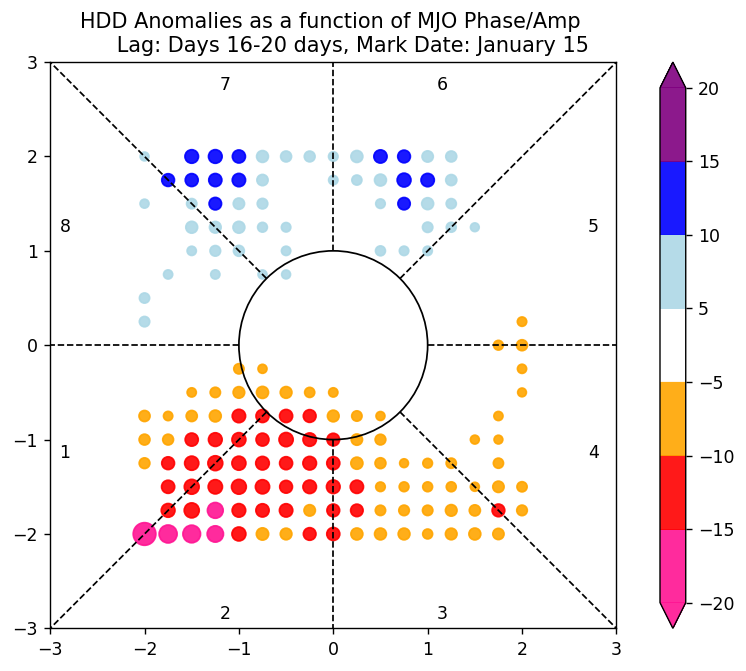

In [11]:
fig = plt.figure(figsize=(9,6),dpi=125)
ax = plt.axes()

if DD_Category == 'hdd':
    clevprecip = np.array([-20,-15,-10,-5,+5,10,15,20])
    colors_MJO= [('deeppink'),('red'), ('orange'), ('white'), ('lightblue'), ('blue'),('purple')]
else:
    clevprecip = np.array([-10,-7,-4,-1,1,4,7,10])
    colors_MJO= [('purple'),('blue'), ('lightblue'), ('white'), ('orange'), ('red'),('deeppink')]

cmap2= mcolors.ListedColormap(colors_MJO, 'MJOPhaseAmp');
newcmp = ListedColormap(colors_MJO)
norm = mcolors.BoundaryNorm(clevprecip, newcmp.N)

if DD_Category == 'hdd':
    ax.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title='HDD Anomalies as a function of MJO Phase/Amp \n  \
    Lag: ' + str(Lag_Period_Names[Lag_Period]) + f' days, Mark Date: {today:%B %d}')
    t  =  ax.scatter(rmm1_range_adj, rmm2_range_adj, s=5*abs(HDD_Anom_Lag_All[:,Lag_Period]), c=HDD_Anom_Lag_All[:,Lag_Period], cmap=newcmp, norm=norm, alpha=.9)

elif DD_Category == 'cdd':
    ax.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title='CDD Anomalies as a function of MJO Phase/Amp \n  \
    Lag: ' + str(Lag_Period_Names[Lag_Period]) + f' days, Mark Date: {today:%B %d}')
    t  =  ax.scatter(rmm1_range_adj, rmm2_range_adj, s=5*abs(CDD_Anom_Lag_All[:,Lag_Period]), c=CDD_Anom_Lag_All[:,Lag_Period], cmap=newcmp, norm=norm, alpha=.9)

cbar=plt.colorbar(t,ticks=clevprecip,pad=0.05, aspect=20, extend='both')    
draw_mjo_phase(ax)

# Phase Change

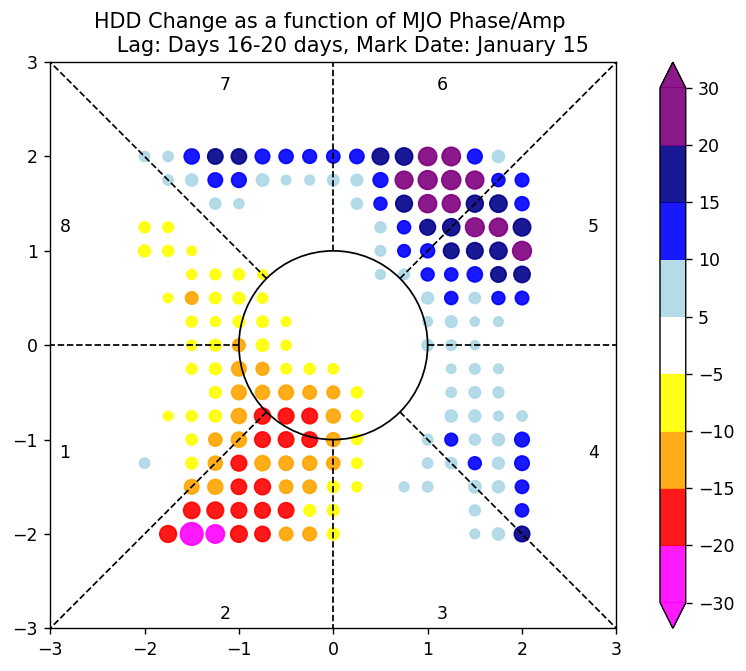

In [12]:
fig = plt.figure(figsize=(9,6),dpi=125)
ax = plt.axes()

if DD_Category == 'hdd':
    clevprecip = np.array([-30, -20,-15,-10,-5,+5,10,15,20, 30])
    colors_MJO= [('magenta'),('red'), ('orange'), ('yellow'), ('white'), ('lightblue'), ('blue'), ('darkblue'), ('purple')]
else:
    clevprecip = np.array([-10,-7,-4,-1,1,4,7,10])
    colors_MJO= [('purple'),('blue'), ('lightblue'), ('white'), ('orange'), ('red'),('deeppink')]

cmap2= mcolors.ListedColormap(colors_MJO, 'MJOPhaseAmp');
newcmp = ListedColormap(colors_MJO)
norm = mcolors.BoundaryNorm(clevprecip, newcmp.N)


if DD_Category == 'hdd':
    ax.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title='HDD Change as a function of MJO Phase/Amp \n  \
    Lag: ' + str(Lag_Period_Names[Lag_Period]) + f' days, Mark Date: {today:%B %d}')
    t  =  ax.scatter(rmm1_range_adj, rmm2_range_adj, s=5*abs(HDD_Change[:,Lag_Period]),c=HDD_Change[:,Lag_Period], cmap=newcmp, norm=norm, alpha=.9)
elif DD_Category == 'cdd':
    ax.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title='CDD Change as a function of MJO Phase/Amp \n  \
    Lag: ' + str(Lag_Period_Names[Lag_Period]) + f' days, Mark Date: {today:%B %d}')   
    t  =  ax.scatter(rmm1_range_adj, rmm2_range_adj, s=5*abs(CDD_Change[:,Lag_Period]),c=CDD_Change[:,Lag_Period], cmap=newcmp, norm=norm, alpha=.9)
cbar=plt.colorbar(t,ticks=clevprecip,pad=0.05, aspect=20, extend='both')    
draw_mjo_phase(ax)

# Stats

In [13]:
#  0 . 1 . 2   3   4 . 5 . 6   7 . 8  .9  10  .11 .12  13 .14  15 .16  17 18 19 .20  .21 .22  23 . 24
rmm1_array=np.array([-2, -2, -2, -2, -2, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1, 1,  1,  2,  2,  2,  2,  2])
rmm2_array=np.array([-2, -1,  0,  1,  2, -2, -1,  0,  1,  2, -2, -1,  0,  1,  2, -2, -1,  0, 1,  2, -2, -1,  0,  1,  2])
#print(rmm1_range_adj)
#print(rmm2_range_adj)

rmm1_array=rmm1_range_adj
rmm2_array=rmm2_range_adj

print('HDD Change Summary:')
print('')
print('Min Change at each lag:', + np.round(np.nanmin(HDD_Change, axis=0),1))
Min1=np.argmin(HDD_Change, axis=0)
print('Min Change at any lag: ', + np.min(np.round(np.nanmin(HDD_Change, axis=0),1)))
Min2=np.argmin(np.nanmin(HDD_Change, axis=0),axis=0)
print('Lag Period =', Min2, '    0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25')
print ('RMMs Corresponding to Min Change:')
print('RMM1 = ', rmm1_array[Min1[Min2]])
print('RMM2 = ', rmm2_array[Min1[Min2]])

print()
print('Max Change at each lag:', + np.round(np.nanmax(HDD_Change, axis=0),1))
Max1=np.argmax(HDD_Change, axis=0)
print('Max Change at any lag: ', + np.max(np.round(np.nanmax(HDD_Change, axis=0),1)))
Max2=np.argmax(np.nanmax(HDD_Change, axis=0),axis=0)
print('Lag Period =', Max2, '    0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25')
print ('RMMs Corresponding to Max Change:')
print('RMM1 = ', rmm1_array[Max1[Max2]])
print('RMM2 = ', rmm2_array[Max1[Max2]])

print('')
print('---------------')

print('HDD Anomaly Summary:')
print('')
print('Min Anomaly at each lag:', + np.round(np.nanmin(HDD_Anom_Lag_All, axis=0),1))
Min1=np.argmin(HDD_Anom_Lag_All, axis=0)
print('Min Anomaly at any lag: ', + np.min(np.round(np.nanmin(HDD_Anom_Lag_All, axis=0),1)))
Min2=np.argmin(np.nanmin(HDD_Anom_Lag_All, axis=0),axis=0)
print('Lag Period =', Min2, '    0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25')
print ('RMMs Corresponding to Min Anomaly:')
print('RMM1 = ', rmm1_array[Min1[Min2]])
print('RMM2 = ', rmm2_array[Min1[Min2]])

print()
print('Max Anomaly at each lag:', + np.round(np.nanmax(HDD_Anom_Lag_All, axis=0),1))
Max1=np.argmax(HDD_Anom_Lag_All, axis=0)
print('Max Anomaly at any lag: ', + np.max(np.round(np.nanmax(HDD_Anom_Lag_All, axis=0),1)))
Max2=np.argmax(np.nanmax(HDD_Anom_Lag_All, axis=0),axis=0)
print('Lag Period =', Max2, '    0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25')
print ('RMMs Corresponding to Max Anomaly:')
print('RMM1 = ', rmm1_array[Max1[Max2]])
print('RMM2 = ', rmm2_array[Max1[Max2]])


HDD Change Summary:

Min Change at each lag: [  0.  -15.6 -22.5 -33.4 -20.6]
Min Change at any lag:  -33.4
Lag Period = 3     0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25
RMMs Corresponding to Min Change:
RMM1 =  -1.5
RMM2 =  -2.0

Max Change at each lag: [ 0.  23.9 21.3 23.5 26.7]
Max Change at any lag:  26.7
Lag Period = 4     0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25
RMMs Corresponding to Max Change:
RMM1 =  2.0
RMM2 =  1.0

---------------
HDD Anomaly Summary:

Min Anomaly at each lag: [-30.8 -20.6 -18.5 -33.9 -27.9]
Min Anomaly at any lag:  -33.9
Lag Period = 3     0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25
RMMs Corresponding to Min Anomaly:
RMM1 =  -2.0
RMM2 =  -2.0

Max Anomaly at each lag: [12.9 18.1 17.2 12.7 11.4]
Max Anomaly at any lag:  18.1
Lag Period = 1     0=Days 1-5, 1=Days 6-10, 2=Days 11-15, 3=Days 16-20, 4=Days 21-25
RMMs Corresponding to Max Anomaly:
RMM1 =  -1.5
RMM2 =  1.0


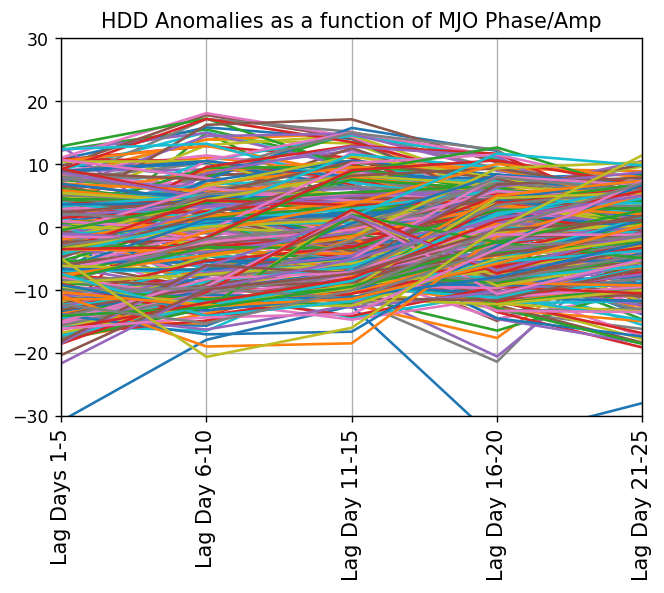

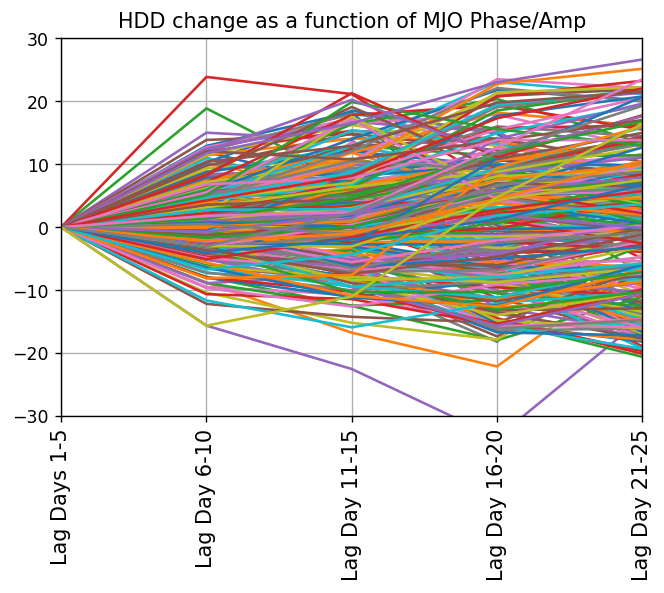

In [14]:
RMM_Pairs=np.array([2,0,10,20,22, 24,14,4])  # 2 Std Events

fig = plt.figure(figsize=(6,4),dpi=125)
ax = plt.axes()

start=23
#for squares in np.array(RMM_Pairs):
for squares in np.arange(len(RMM1_Lag_All)):
#for squares in np.arange(start,start+1,1):
     s=ax.plot(HDD_Anom_Lag_All[squares,0:5]) 

ax.set(xlim=(0, 4), ylim=(-30, 30),title='HDD Anomalies as a function of MJO Phase/Amp')
#ax.legend(['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7', 'Phase 8'])

# Set ticks labels for x-axis
x_ticks_labels = ['Lag Days 1-5','Lag Day 6-10','Lag Day 11-15','Lag Day 16-20','Lag Day 21-25']
ax.xaxis.set_ticks(np.arange(0, 5,1))
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=12)
plt.grid()


fig = plt.figure(figsize=(6,4),dpi=125)
ax = plt.axes()

start=23
#for squares in np.array(RMM_Pairs):
for squares in np.arange(len(RMM1_Lag_All)):
#for squares in np.arange(start,start+1,1):
     s=ax.plot(HDD_Change[squares,0:5])  # Normalized to Day 0

ax.set(xlim=(0, 4), ylim=(-30, 30),title='HDD change as a function of MJO Phase/Amp')
#ax.legend(['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5', 'Phase 6', 'Phase 7', 'Phase 8'])

# Set ticks labels for x-axis
x_ticks_labels = ['Lag Days 1-5','Lag Day 6-10','Lag Day 11-15','Lag Day 16-20','Lag Day 21-25']
ax.xaxis.set_ticks(np.arange(0, 5,1))
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=12)
plt.grid()

# Plot Mean Phase/Amp Evolutions (RMM_Steps Must be Equal to 1.0

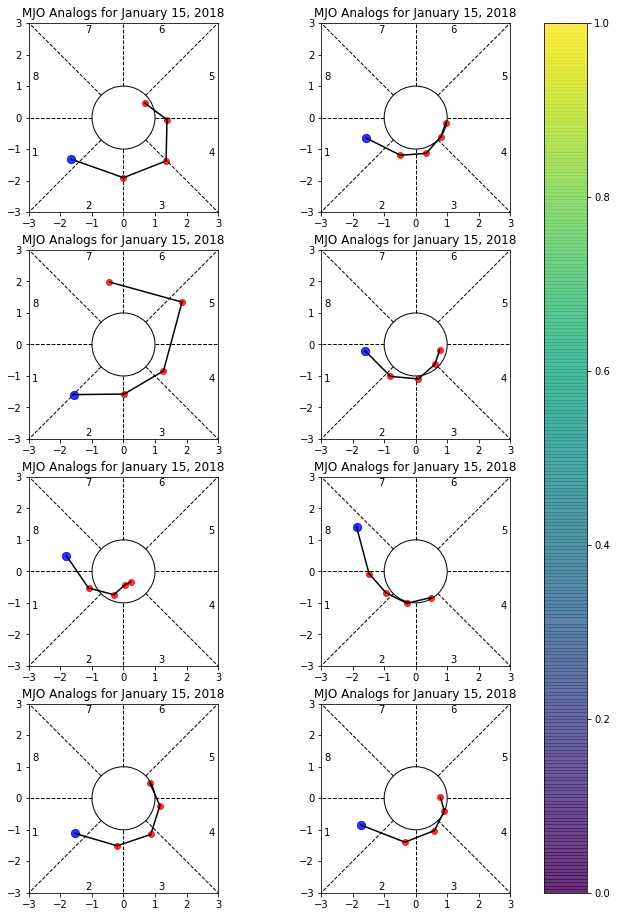

In [15]:
fig, axs = plt.subplots(4, 2,figsize=(12,16))

RMM_Pairs=np.array([2,0,10,20,22, 24,14,4])  # 2 Std Events
RMM_Pairs_1std=np.array([0,10,20,22,24, 14,4,2])  # 1 Std Events (to be defined)

counter_rows=0
counter_cols=0
for squares in np.array(RMM_Pairs):
    for i in np.arange(0,5,1):
        axs[counter_rows,counter_cols].plot(RMM1_Lag_All[squares,i:i+2],RMM2_Lag_All[squares,i:i+2],'k-')
        if i==0:
            s = axs[counter_rows,counter_cols].scatter(RMM1_Lag_All[squares,i], RMM2_Lag_All[squares,i], s=68,c='blue',alpha=0.8)
        else:
            s = axs[counter_rows,counter_cols].scatter(RMM1_Lag_All[squares,i], RMM2_Lag_All[squares,i], c='red',alpha=0.8)
    counter_rows=counter_rows+1
    if counter_rows==4:
        counter_cols=1
        counter_rows=0
            
fig.colorbar(s, ax=axs)
#fig.colorbar(ax=axs, orientation='horizontal', fraction=.1)

for cols in np.arange(2):
    for rows in np.arange(4):
        axs[rows,cols].set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title=f'MJO Analogs for {today:%B %d, %Y}')
        draw_mjo_phase(axs[rows,cols])

# RMM Phase (current)

In [16]:
######################################################################
### Grab real-time MJO/RMM Data and stick in the df_realtime dataframe
######################################################################
url = 'http://www.bom.gov.au/climate/mjo/graphics/rmm.74toRealtime.txt'
headers = {'User-Agent': 'Mozilla/5.0'}
req = Request(url=url, headers=headers) 
data = urlopen(req)
df_realtime = pd.read_csv(data, sep='\s+', skiprows=2, usecols=range(5), header=None,
                     parse_dates=[[0, 1, 2]],
                     names=['Year', 'Month', 'Day', 'RMM1', 'RMM2'])

########################
### Get Today's Date ###
########################
MarkDate=datetime.now()
MarkDate=MarkDate.strftime("%Y-%m-%d")
#MarkDate='2018-10-01'
today = pd.Timestamp(MarkDate)

import datetime
##############################
### Adjust by minus 2 days ###
##############################
format_str = '%Y-%m-%d' # The formatdf.loc['2018-09-10']
MarkDate_adj = datetime.datetime.strptime(MarkDate, format_str) - timedelta(hours=int(48))
MarkDate_adj=MarkDate_adj.strftime("%Y-%m-%d")
MarkDate_adj

######################################################################
### MarkDate_adj subtracts two dates from the current date because 
### the RMM real-time data set is typiclly lagged by 2 days
######################################################################

from datetime import datetime, date, timedelta

print(today)
print()

cur_rmm1= df_realtime['RMM1'].loc[(df_realtime['Year_Month_Day'] == MarkDate_adj)].values
cur_rmm2= df_realtime['RMM2'].loc[(df_realtime['Year_Month_Day'] == MarkDate_adj)].values

print(cur_rmm1)
print(cur_rmm2)
print()

df = get_data(-17)
analogs = find_analogs(df, today, (cur_rmm1, cur_rmm2), first_year, last_year, analog_range,proximity_filter, progression_filter, \
                            Amp_filter, Angle_filter)
print(analogs['hdd_anom'].describe())

2019-10-24 00:00:00

[-0.18104964]
[-1.8060942]

count    94.000000
mean     -1.772553
std      17.314486
min     -29.910000
25%     -16.585000
50%       0.540000
75%      12.482500
max      43.530000
Name: hdd_anom, dtype: float64


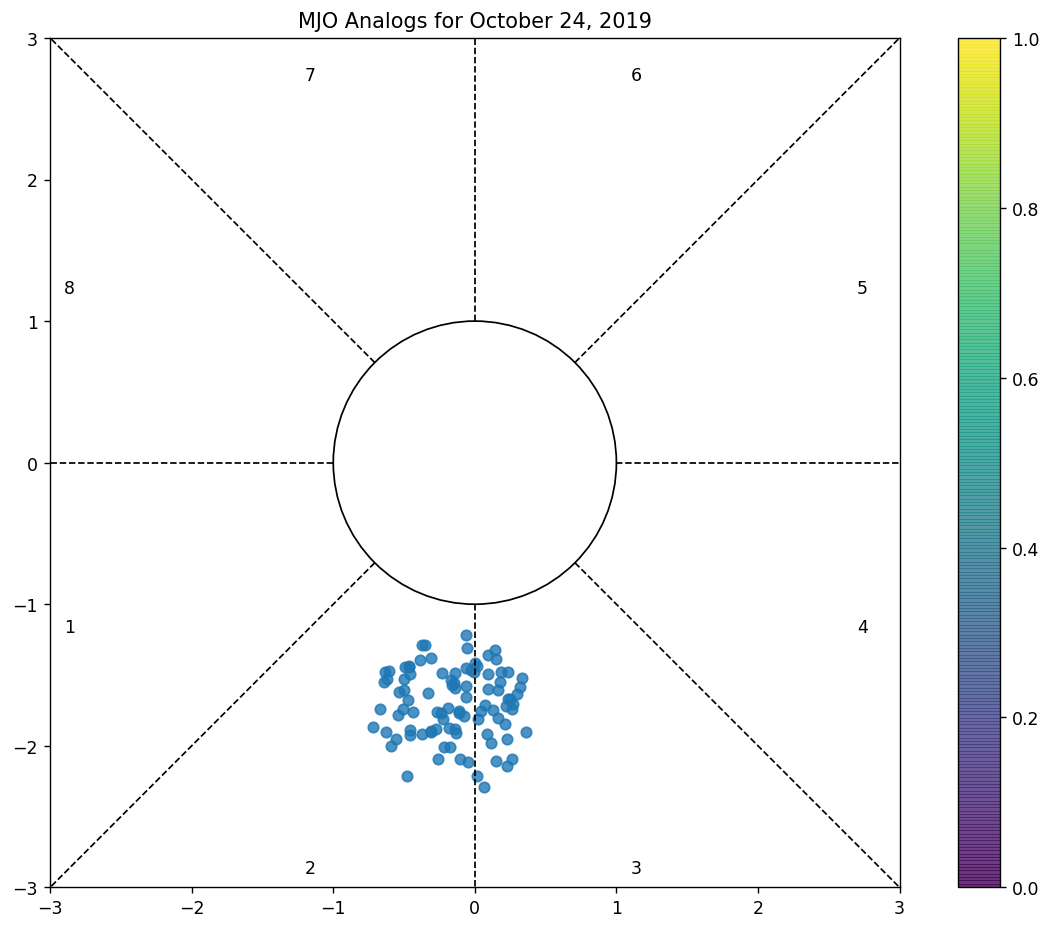

In [17]:
fig = plt.figure(figsize=(12,9),dpi=125)
ax = plt.axes()
#s = ax.scatter(analogs['RMM1'], analogs['RMM2'], c=analogs['hdd_anom'], alpha=0.8)
s = ax.scatter(analogs['RMM1'], analogs['RMM2'], alpha=0.8)

plt.colorbar(s)
ax.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title=f'MJO Analogs for {today:%B %d, %Y}')
draw_mjo_phase(ax)

# Scratch

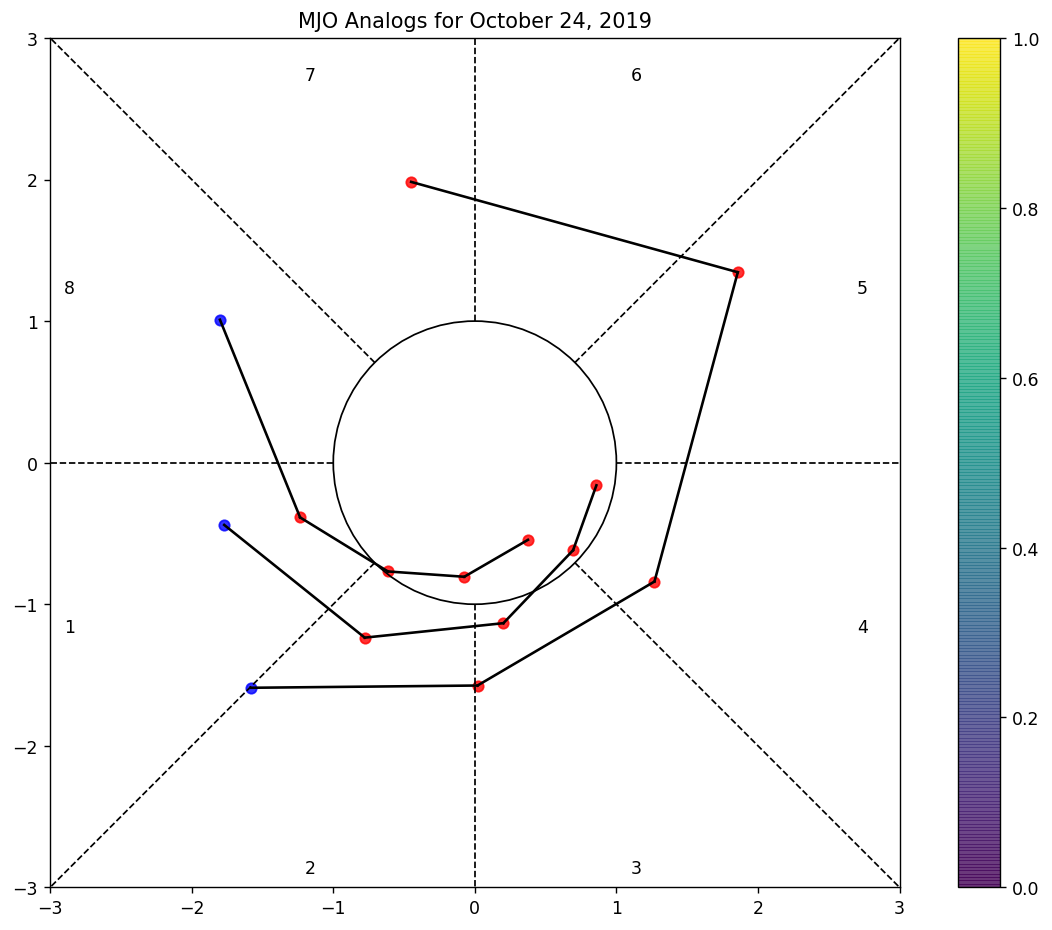

In [18]:
fig = plt.figure(figsize=(12,9),dpi=125)
ax = plt.axes()

#for squares in np.arange(len(RMM1_Lag_All)):
for squares in np.arange(0,16,6):
    for i in np.arange(0,5,1):
        plt.plot(RMM1_Lag_All[squares,i:i+2],RMM2_Lag_All[squares,i:i+2],'k-')
        if i==0:
            s = ax.scatter(RMM1_Lag_All[squares,i], RMM2_Lag_All[squares,i], c='blue',alpha=0.8)
        else:
            s = ax.scatter(RMM1_Lag_All[squares,i], RMM2_Lag_All[squares,i], c='red',alpha=0.8)

          #  s = ax.scatter(RMM1_Lag_All[squares,i], RMM2_Lag_All[squares,i], c='red',alpha=0.8)

plt.colorbar(s)
ax.set(xlim=(-3, 3), ylim=(-3, 3), aspect='equal', title=f'MJO Analogs for {today:%B %d, %Y}')
draw_mjo_phase(ax)